<a href="https://colab.research.google.com/github/alexander89116/dls/blob/master/seminar1/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500/></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

## Matplotlib

`matplotlib` --- один из наиболее популярных пакетов для построения гарфиков

`%matplotlib inline` --- специальная `ipython` команда, которая позволяет отображать графики прямо в `jupyter notebook`

Некоторые основные команды для рисования графиков:
    
* `plt.scatter(x, y, *args)` — нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси
* `plt.plot(x, y, *args)` — нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.
* `plt.contour(x1, x2, y, lines)` — нарисовать линии уровня.

Вспомогательные функции
* `plt.figure(figsize=(x, y))` — создать график размера $(x, y)$
* `plt.show()` — показать график.
* `plt.xlim(x_min, x_max)` — установить пределы графика по горизонтальной оси
* `plt.ylim(y_min, y_max)` — установить пределы графика по вертикальной оси
* `plt.title(name)` — установить имя графика
* `plt.xlabel(name)` — установить название горизонтальной оси
* `plt.ylabel(name)` — установить название вертикальной оси
* `plt.legend()` — сделать легенду
* `plt.grid()` — добавить сетку на график
* `plt.savefig(filename)` — сохранить график в файл

Для отображения в notebook

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [0]:
# установим фиксированный размер наших графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [0]:
# для того, чтобы не засорять вывод предупреждениями
import warnings
warnings.filterwarnings('ignore')

Сейчас пора, когда многие болеют. Построим зависимость числа больных в семье Ивановых и Сидоровых от температуры на улице.

Мы имеем дискретное распределение, поэтому самое напрашиваемое представление это обычные точки

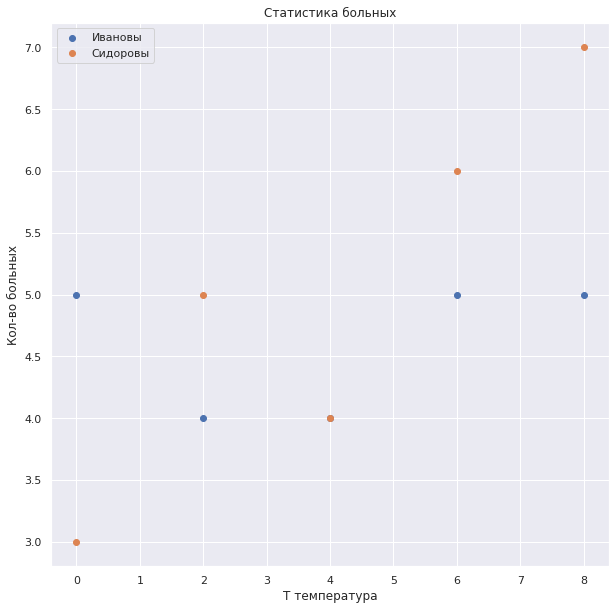

In [5]:
np.random.seed(42)
family_ivan = np.random.poisson(5, 5)
family_sid = np.random.poisson(5, 5)

x = np.arange(0, 10, 2)
plt.scatter(x, family_ivan, label='Ивановы')
plt.scatter(x, family_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Чтобы отследить зависмость лучше, воспользуемся непрерывным представление

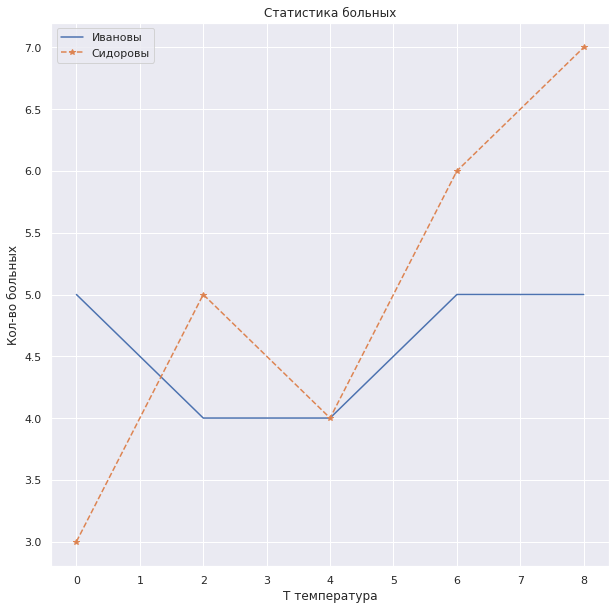

In [8]:
plt.plot(x, family_ivan, '-', label='Ивановы')
plt.plot(x, family_sid, '*--', label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Давайте попробуем другое представление полученных данных c помощью bar-chart:

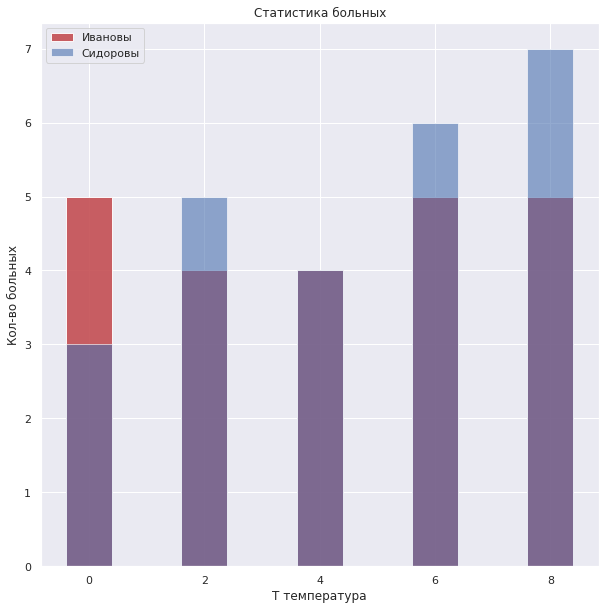

In [11]:
plt.bar(x, family_ivan, alpha=0.9
      , label='Ивановы', color='r')
plt.bar(x, family_sid, alpha=0.6, label='Сидоровы', color='b')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()


Можно попробовать нарисовать статистику в виде так называемого *pie-chart*

Заодно посмотрим, как на одной фигуре отрисовать несколько графиков

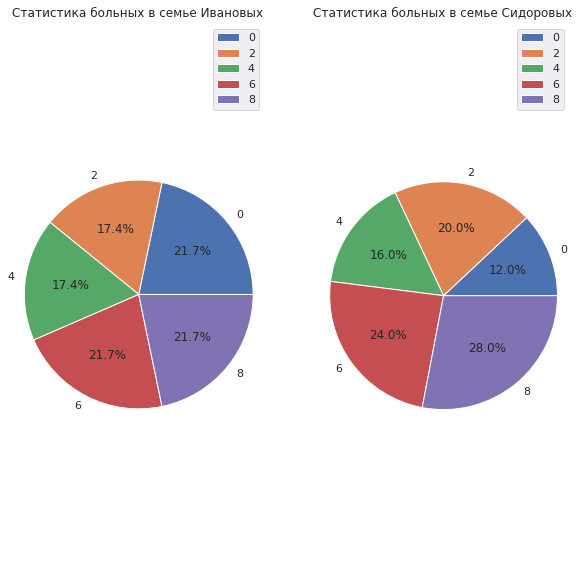

In [19]:
plt.subplot(1, 2, 1)
plt.pie(family_ivan, labels=x, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Статистика больных в семье Ивановых')
plt.legend()
plt.subplot(1, 2, 2)
plt.pie(family_sid, labels=x, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Статистика больных в семье Сидоровых')
plt.legend()
plt.show()

Данные графики получились не интуитивно понятными.

Визуализация данных - важная часть работы, и всегда надо думать, в каком виде лучше представить их, чтобы графики получались наиболее информативными и понятными/

Давайте функции зависимоcти сделаем более гладкими:

In [0]:
from scipy.interpolate import interp1d
f_ivan = interp1d(np.arange(0, 10, 2), family_ivan, kind='quadratic', fill_value="extrapolate")
f_sid = interp1d(np.arange(0, 10, 2), family_sid, kind='quadratic', fill_value="extrapolate")

Отобразим получившиеся функции:

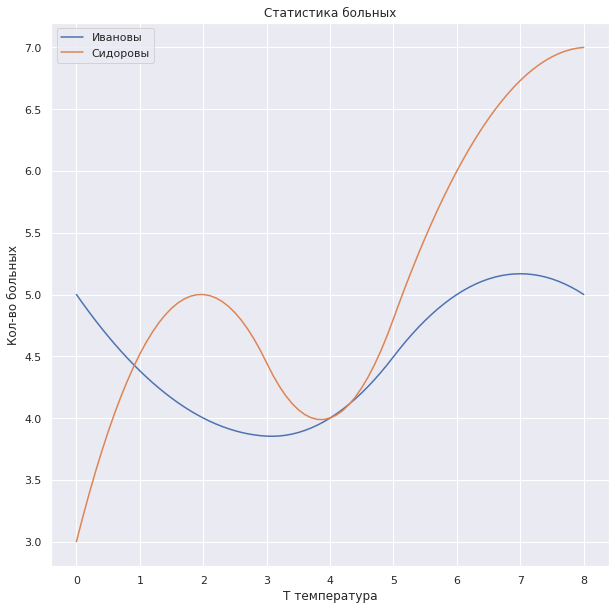

In [21]:
xnew = np.arange(0, 8.1, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Найдем самую оптимальную температуру для каждой семьи

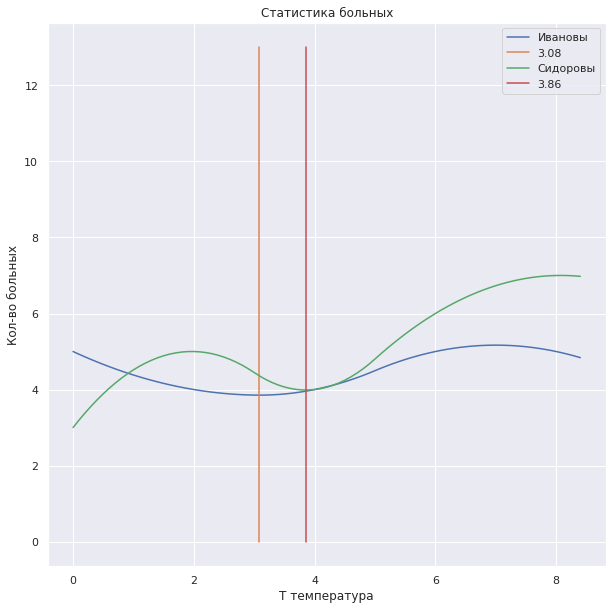

In [24]:
from scipy.optimize import minimize
max_ivan = minimize(f_ivan, x0=4)
max_sid = minimize(f_sid, x0=4)
xnew = np.arange(0, 8.5, 0.1)
ynew_ivan = f_ivan(xnew)
ynew_sid = f_sid(xnew)
plt.plot(xnew, ynew_ivan, label='Ивановы')
plt.plot([max_ivan.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_ivan.x[0].round(2)))
plt.plot(xnew, ynew_sid, label='Сидоровы')
plt.plot([max_sid.x[0]] * 14, np.arange(0, 14), label='{}'.format(max_sid.x[0].round(2)))
plt.title('Статистика больных')
plt.ylabel('Кол-во больных')
plt.xlabel('T температура')
plt.legend()
plt.show()

Также можно строить геометрические фигуры или параметрические линии $x=x(t)$, $y=y(t)$.

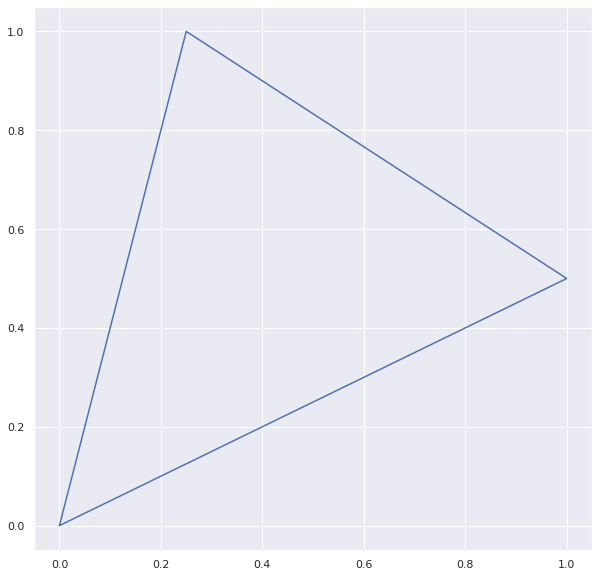

In [25]:
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

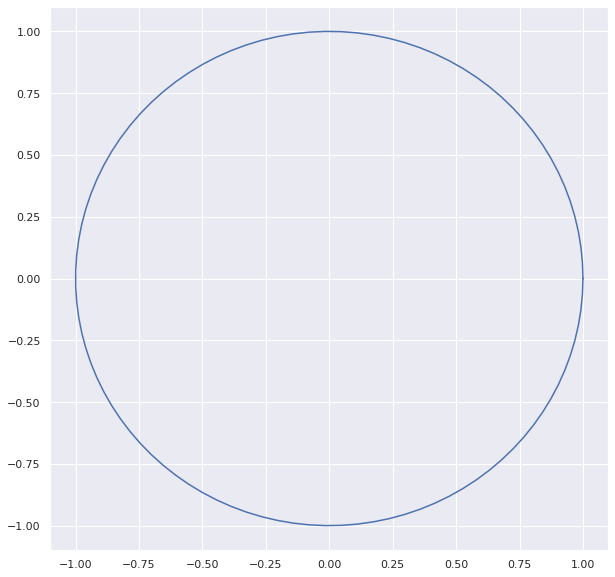

In [26]:
t = np.linspace(0, 2 * np.pi, 100)

plt.plot(np.cos(t), np.sin(t))
# plt.axes().set_aspect(1)
plt.show()

Попробуем сгенерировать выборку из нормального распределения и порисовать для нее графики. Если что-то будет не понятно, не страшно, наша цель - попрактиковаться в построении графиков

In [0]:
# сгенерируем 200 случайных точек
import scipy.stats as sps

sample = sps.norm.rvs(size=200)

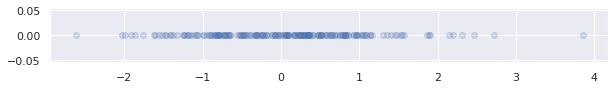

In [28]:
plt.figure(figsize=(10, 1))
plt.scatter(sample, np.zeros(200), alpha=0.2)  # alpha - прозрачность точки
plt.show()

Добавим график плотности

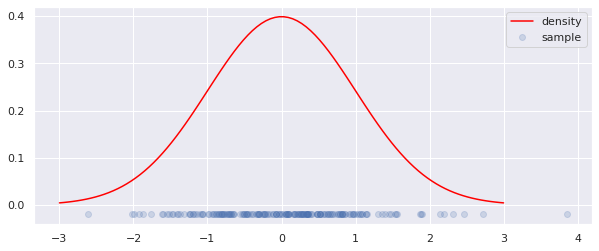

In [29]:
grid = np.linspace(-3, 3, 100)

plt.figure(figsize=(10, 4))
plt.scatter(sample, np.zeros(200) - 0.02, alpha=0.2, label='sample')
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')
plt.legend()
plt.show()

Нарисуем гистограмму, вместо точек, т.к. она более наглядна

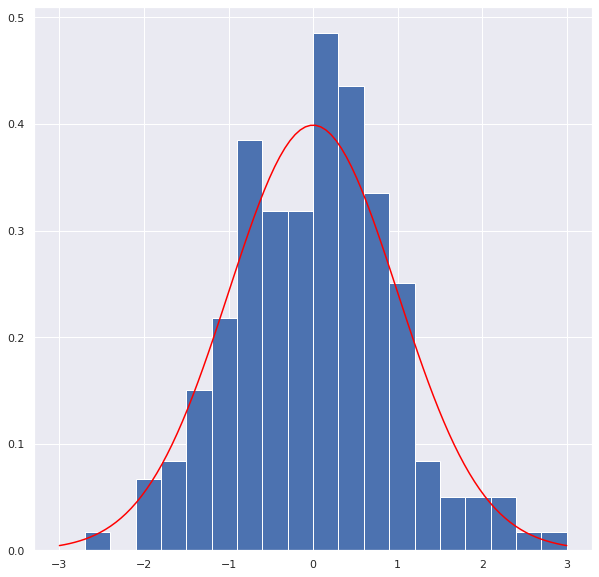

In [33]:
plt.figure()
plt.hist(sample, range=(-3, 3), bins=20, density=True)
plt.plot(grid, sps.norm.pdf(grid), color='red', label='density')
plt.show()

**Линии уровня**

Предположим, что мы хотим изучить поверхность $z = xy$

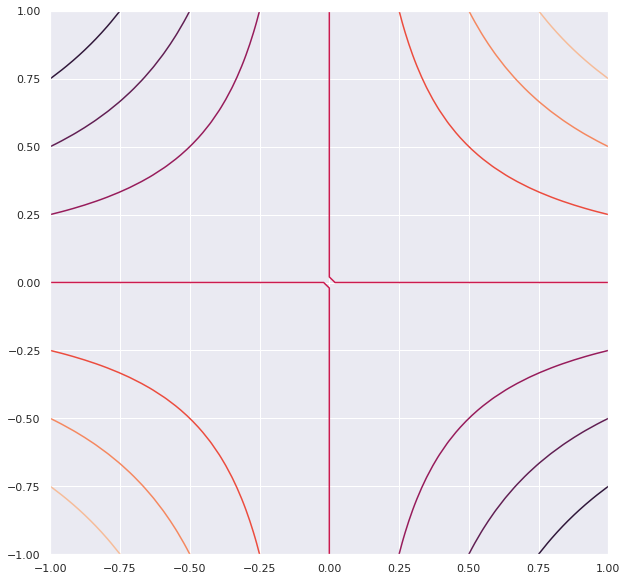

In [34]:
x = np.linspace(-1, 1, 50)
y = x
# внешнее произведение
# т.е, если размер x и y = 50, то размер z = (50, 50)
# где z[i][j] = x[i]*y[j]
z = x.reshape(-1, 1) * y

plt.contour(x, y, z)
plt.show()

Более наглядный график

Здесь значение задается цветом

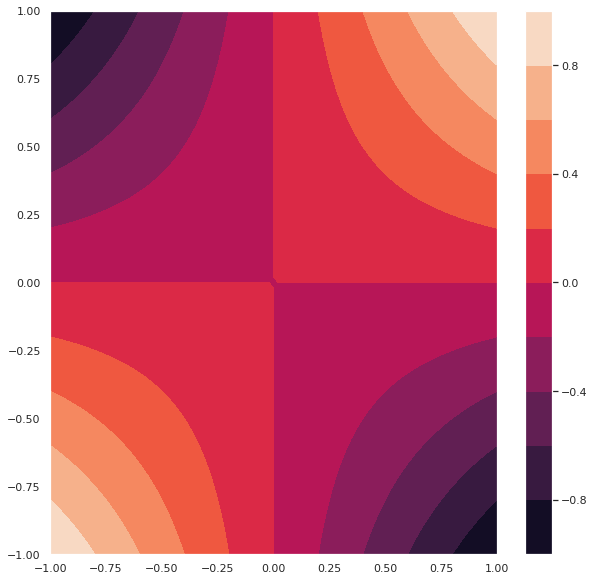

In [35]:
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
# colorbar показывает соответствие цвета и значения z
plt.colorbar()
plt.show()

А теперь построим график в полярных координатах, потому что это красиво) Будем плоттить синус

In [0]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(2 * x)
y4 = np.sin(4 * x)

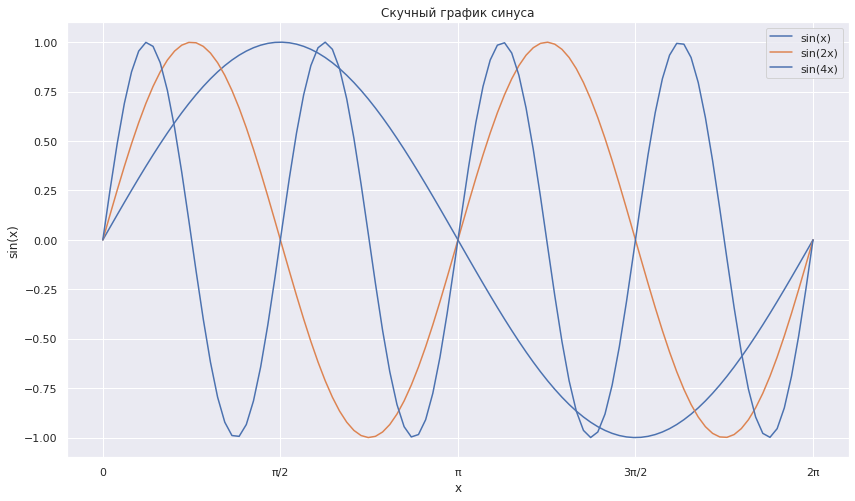

In [37]:
# Обычный график
plt.figure(figsize=(14, 8))
plt.plot(x, y1, label='sin(x)')
plt.plot(x, y2, label='sin(2x)')
plt.plot(x, y4, label='sin(4x)', c='b')
plt.title('Скучный график синуса')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ['0', 'π/2', 'π', '3π/2', '2π'])
plt.legend()
plt.show()

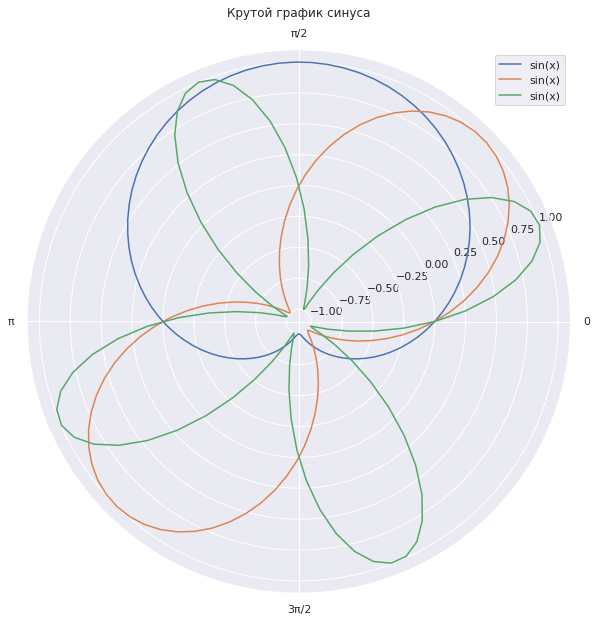

In [38]:
# Полярный график
plt.polar(x, y1, label='sin(x)')
plt.polar(x, y2, label='sin(x)')
plt.polar(x, y4, label='sin(x)')
plt.title('Крутой график синуса')
plt.xticks(np.linspace(0, 2 * np.pi, 5), ['0', 'π/2', 'π', '3π/2', ''])
plt.legend()
plt.show()

В ноутбуках можно делать анимации с помощью matplotlb (такое нет смысла запоминать, как и все функции matplotlib. Мой референс, откуда я просто скопировал код и отредактировал http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/)

In [0]:
from IPython.display import HTML
from matplotlib import animation, rc

In [0]:
# Кстати, есть вероятность, что анимация не заработает из-за кодеков. У меня не был
# утановлен отдельно ffmpeg и анимация не заработала. Если у вас линукс и не работает,
# то попробуйте раскомментить эту строчку.
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

В matplotlib есть два API - первое мы уже использовали выше (т.е. просто писали, что нужно нарисовать и оно рисовалось), но для сложных графиков такого не достаточно. Поэтому в matplotlib есть еще одно API - объектное. В этом случае мы отдельно создаем фигуру, добавляем на нее оси и т.д. Просто взаимодействуем с частями графика как с объектами.

In [0]:
x = np.linspace(0, 2 * np.pi, 100)

No handles with labels found to put in legend.


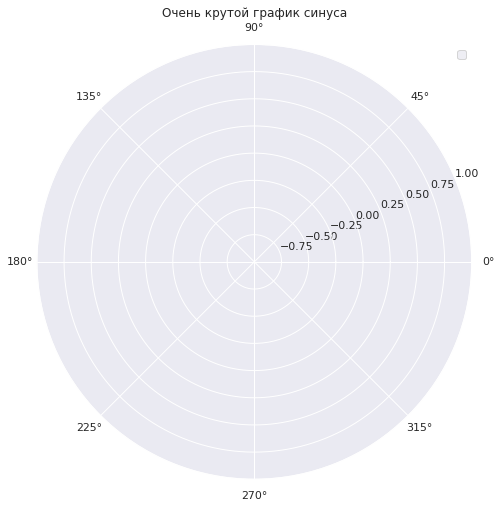

In [45]:
# Создадим нужную фигуру
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='polar')

ax.set_title('Очень крутой график синуса')
ax.set_ylim([-1, 1])
ax.set_xlim([0, 2 * np.pi])
ax.set_xticks(np.linspace(0, 2 * np.pi, 5), ['0', 'π/2', 'π', '3π/2', ''])
ax.legend()

# Создадим линию, в которую будем класть данные
sinus_line = ax.plot([], [])[0]

In [0]:
# Скопируем код с ссылки выше
# initialization function: plot the background of each frame
def init():
    sinus_line.set_data([], [])
    return (sinus_line,)

# animation function. This is called sequentially
def animate(i):
    y = np.sin(x * i / 10)
    sinus_line.set_data(x, y)
    return (sinus_line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

In [47]:
HTML(anim.to_html5_video())

**Заключение**

Мы посмотрели только на малую часть функциональности `matplotlib` --- эта библиотека имеет множество других функций, которые помогут вам построить почти любой график, которые вы захотите, и рассмотрение всех этих функций никак не уложится в одно занятие

Стоит посмотреть https://matplotlib.org/gallery.html --- здесь собраны сотни примеров, как можно рисовать графики

`matplotlib` - мощный инструмент, однако, чтобы рисовать действительно красивые графики, он требует больших знаний

Стоит обратить внимание на следующие библиотеки:


`seaborn` (оф сайт: https://seaborn.pydata.org/) - это библиотека, которая написана поверх `matplotlib`, и она помогает строить более красивые графики, затрачивая меньшее количество усилий

Если интересно, то можно посмотреть:

* https://seaborn.pydata.org/tutorial.html - оф. туториалы

* https://habr.com/ru/company/ods/blog/323210/ - замечательная статья на habre от ods

`plotly` (оф сайт: https://plot.ly/) - еще одна библиотека для рисования графиков, которая написана поверх `javascript` библиотеки

Если интересно, то стоит посмотреть:
* https://plot.ly/python/ - официальные туториалы (можете сравнить, насколько получаются более красивые графики)
* https://towardsdatascience.com/the-next-level-of-data-visualization-in-python-dd6e99039d5e - неплохая статья на medium